https://machinelearningmastery.com/implement-random-forest-scratch-python/

https://www.edureka.co/blog/random-forest-classifier/

Random forest algorithm is a supervised classification and regression algorithm. As the name suggests, this algorithm randomly creates a forest with several trees
Generally, the more trees in the forest the more robust the forest looks like. Similarly, in the random forest classifier, the higher the number of trees in the forest, greater is the accuracy of the results.

<img src="Classification-Random-Forest-Random-Forest-In-R-Edureka-2-381x300.png">

Random forest is an ensemble of decision trees, it randomly selects a set of parameters and creates a decision tree for each set of chosen parameters.

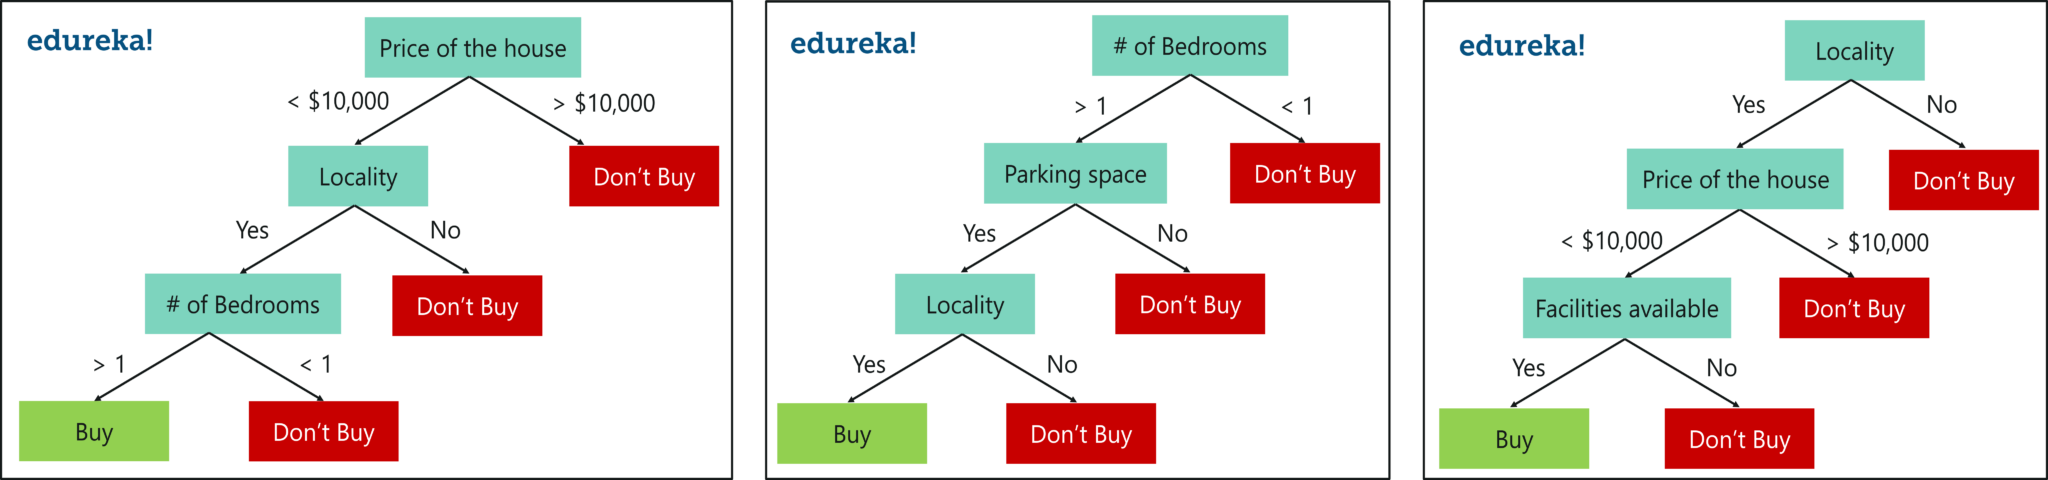

In [1]:
# Random Forest Algorithm on Sonar Dataset
from random import seed
from random import randrange
from csv import reader
from math import sqrt

In [2]:
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

In [3]:
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

In [4]:
# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    print(unique)
    for i, value in enumerate(unique):
        print(value)
        print(i)
        lookup[value] = i
        print('for value', value,'-',lookup[value])
    for row in dataset:
        #print(row)
        row[column] = lookup[row[column]]
    return lookup

In [5]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):   # n_folds = 5 given
    print('len of data', len(dataset))
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)    
    print('foldsize',fold_size)
    for i in range(n_folds):
        print('i', i)
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            #print('index',index)
            fold.append(dataset_copy.pop(index))
            #print('len of dataset_copy after popping', len(dataset_copy))
            #print('fold',fold)
        dataset_split.append(fold)
        #print('datasplit',dataset_split)
        print('len of datasplit',len(dataset_split))
    return dataset_split
 

In [6]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
            return correct / float(len(actual)) * 100.0

In [33]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    print('**********in evaluate algo*************')
    folds = cross_validation_split(dataset, n_folds)   # taking 5 cross validatoin data of containing 40 rows each from dataset 
    print('crossfolds',len(folds))
    scores = list()
    for fold in folds:
        #print('fold',len(fold))    # iterating through each fold in 5 folds
        train_set = list(folds)
        train_set.remove(fold)  # remove that fold from train_set 
        train_set = sum(train_set, [])  #  sum(iterable, start) , iterable can be list tupple or dictionaries ,
                                        #  but most importantly it should be numbers. adding empty list to train_set list
        test_set = list()
        #print("train", len(train_set))
        
        for row in fold:       # iterating each row in that fold
            #print('row',row)
            row_copy = list(row)
            test_set.append(row_copy)  # add the rows to test_set from that fold
            row_copy[-1] = None
        #print("test", len(test_set)) 
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores


In [36]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
    left, right = list(), list()
    #print("********* in test_split******")
    #print('value', value)
    for row in dataset:
        #print('row[index]', row[index])
        #print('len of row', len(row))
        if row[index] < value:
            left.append(row)
            #print('left', left)
        else:
            right.append(row)
            #print('right', right)
    #print('left', len(left))
    #print('right', len(right))
    return left, right
 
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    #print("**************in gini_index**************")
    #print("n_instance", n_instances)   #  give 164.0 sum of (120 + 44)
    # sum weighted Gini index for each group
    gini = 0.0
    #print('group',groups)
    for group in groups:
        size = float(len(group))
        #print('len of group', size)  # will give the size of left and right groups i.e. 120.0(left) &  44.0(right) 
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            #print('class value', class_val)
            p = [row[-1] for row in group].count(class_val) / size  # counting frequency of the class values in the group
            #print('p', [row[-1] for row in group].count(class_val))
            score += p * p
        # weight the group score by its relative size
        #print('score',score)
        gini += (1.0 - score) * (size / n_instances)
    #print('gini', gini)
    return gini
 
# Select the best split point for a dataset
def get_split(dataset, n_features):
    #print("******** in get split **********")
    class_values = list(set(row[-1] for row in dataset))  # set the class values for last column of the row = {0,1}
    #print('calss values',class_values)
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = list()
    while len(features) < n_features:    # until len pf feature < 7
        index = randrange(len(dataset[0])-1)  # generate the random index in range 60
        #print('index', index)
        #print('features', features)
        if index not in features:
            features.append(index)
    for index in features:    # iterate the index numbers(48,52,...) in feature i.e. features [48, 52, 54, 46, 14, 34]
        for row in dataset:
            groups = test_split(index, row[index], dataset)  # will give left and right group of that index column in row
            gini = gini_index(groups, class_values)  # will  give the gini index using left, right groups and class values
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}
 
# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)
 
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, n_features, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left, n_features)
        split(node['left'], max_depth, min_size, n_features, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right, n_features)
        split(node['right'], max_depth, min_size, n_features, depth+1)
 
# Build a decision tree
def build_tree(train, max_depth, min_size, n_features):  # cross val trainset, max depth = 10, min size = 1, features= 7 
    root = get_split(train, n_features)  # return index, value and group
    split(root, max_depth, min_size, n_features, 1)
    print("*****************************************************************************************")
    #print('root',root)
    return root
 
# Make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']
 
# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):  #ratio = 1.0 given
    sample = list()
    n_sample = round(len(dataset) * ratio)   # len of dataset = 208
    while len(sample) < n_sample:           #  len(sample) < 208 till than
        index = randrange(len(dataset))     # generate the random index value in range 0 - 208
        sample.append(dataset[index])       #  add the index row values to sample => subsample
    return sample
 
# Make a prediction with a list of bagged trees
def bagging_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)
 
# Random Forest Algorithm
def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
    trees = list()
    for i in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, min_size, n_features)  # return root node 
        trees.append(tree)
    predictions = [bagging_predict(trees, row) for row in test]
    return(predictions)
 

In [ ]:
# Test the random forest algorithm
seed(2)
# load and prepare data
filename = 'sonar.all-data.csv'
dataset = load_csv(filename)
print(len(dataset[0]))  # the data file have 61 columns
# convert string attributes to integers
for i in range(0, len(dataset[0])-1):  # column range 0 - 60
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)  # change the last column values (from string 'R' to numeric '0' and 'M' to '1')
# evaluate algorithm
n_folds = 5
max_depth = 10
min_size = 1
sample_size = 1.0
n_features = int(sqrt(len(dataset[0])-1))
for n_trees in [1, 5, 10]:
    scores = evaluate_algorithm(dataset, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
    print('Trees: %d' % n_trees)
    print('Scores: %s' % scores)
    print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

61
{'R', 'M'}
R
0
for value R - 0
M
1
for value M - 1
**********in evaluate algo*************
len of data 208
foldsize 41
i 0
len of datasplit 1
i 1
len of datasplit 2
i 2
len of datasplit 3
i 3
len of datasplit 4
i 4
len of datasplit 5
crossfolds 5
*****************************************************************************************
*****************************************************************************************
*****************************************************************************************
*****************************************************************************************
*****************************************************************************************
Trees: 1
Scores: [2.4390243902439024, 2.4390243902439024, 2.4390243902439024, 2.4390243902439024, 2.4390243902439024]
Mean Accuracy: 2.439%
**********in evaluate algo*************
len of data 208
foldsize 41
i 0
len of datasplit 1
i 1
len of datasplit 2
i 2
len of datasplit 3
i 3
len of datasplit 4
